https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data direct link to the file

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names direct link to data set description

First import all necessary thingies & data, then check if it looks like what you expect it to look like. separate the columns and values so they are nice and clean.

In [210]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
auto_mpg=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
            sep = '\s+', names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin','Car Name'])
mpgcopy=auto_mpg.copy()
mpgcopy.head() #check to see if it did what i wanted it to do

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Next replace all the "?" in the Horse Power column, and do it inplace on the copy

In [211]:
mpgcopy['Horsepower'].replace('?', np.NaN, inplace=True)
#mpgcopy #check if "?" changed to NaNs

Next replace 1 --> USA, 2 --> Asia, and 3 --> Europe. Need to set int to str. Took a few tries, but still went through; can be seen in the first 25 rows. 

In [212]:
#mpgcopy['Origin'] = mpgcopy['Origin'].replace(1, 'USA')                #nope
#mpgcopy
derp=mpgcopy.Origin = mpgcopy.Origin.astype(str) 
mpgcopy.Origin = mpgcopy.Origin.replace({"1": "USA",
                                        "2": "Asia",
                                        "3": "Europe"})
mpgcopy[15:35]                                                        #ok this one worked

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
15,22.0,6,198.0,95.00,2833.0,15.5,70,USA,plymouth duster
16,18.0,6,199.0,97.00,2774.0,15.5,70,USA,amc hornet
17,21.0,6,200.0,85.00,2587.0,16.0,70,USA,ford maverick
18,27.0,4,97.0,88.00,2130.0,14.5,70,Europe,datsun pl510
19,26.0,4,97.0,46.00,1835.0,20.5,70,Asia,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.00,2672.0,17.5,70,Asia,peugeot 504
21,24.0,4,107.0,90.00,2430.0,14.5,70,Asia,audi 100 ls
22,25.0,4,104.0,95.00,2375.0,17.5,70,Asia,saab 99e
23,26.0,4,121.0,113.0,2234.0,12.5,70,Asia,bmw 2002
24,21.0,6,199.0,90.00,2648.0,15.0,70,USA,amc gremlin


Next create bar chart that shows distribution of cylinders (col 2) [??? against what?? acceleration? idk?]

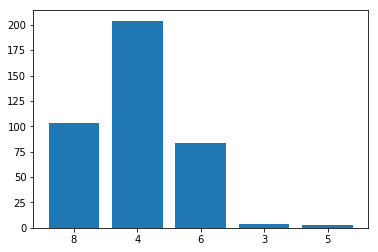

In [213]:
#accellist = mpgcopy['Acceleration'].tolist()
#mpgcopy.Cylinders.plot(kind='bar')
#plt.show()
#mpgcopy.Cylinders.T.plot.bar(rot=0)
#mpgcopy.Cylinders.plot.bar(); plt.axhline(0, color='k')
from collections import Counter                                          #I can use this, right? It's convenient, so..
cylinlist = mpgcopy['Cylinders'].tolist()
cylindict = Counter(cylinlist)
plt.bar(range(len(cylindict)), list(cylindict.values()), align='center')
plt.xticks(range(len(cylindict)), list(cylindict.keys()))
plt.show()

Next create scatterplot of horsepower vs weight.
To clear up the NaN outliers, we use a forwardfill

In [185]:
#THINGS I TRIED BUT NOPE
#sorted_df = mpgcopy.sort_values(by=['Horsepower'])
#sorted_df.Horsepower.fillna(method='ffill', limit=2)
#horselist = sorted_df['Horsepower'].tolist()
#weightlist = sorted_df['Weight'].tolist() 
#[float(i) for i in horselist]
#weightlist.sort()                                               #without this line(5), there is an unexplainable gap
#horselist.sort()                                                #where the weight "resets"??? so it must be sorted.
#horselist = sorted(horselist, key=float)
#---this is "ok"---
#plt.scatter(weightlist, horselist)
#plt.title("Horsepower vs Weight")
#plt.xlabel("Weight")
#plt.ylabel("Horsepower")
#plt.show()

#print (weightlist)

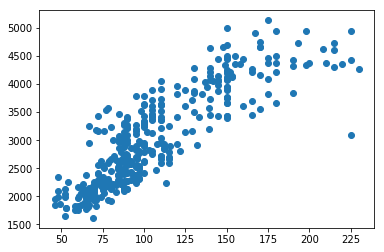

In [204]:
#this is prettier
mpgcopy.sort_values(by='Horsepower')
mpgcopy.Horsepower = mpgcopy.Horsepower.astype(float)
plt.scatter(mpgcopy['Horsepower'], mpgcopy['Weight'])
#fig=plt.figure(figsize=(200, 500), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

"Ask, then answer an interesting question about the distribution of one of the variables, 
or the relationship between two (or more!) of the variables in the “Auto MPG” dataset." 
Lets plot number of entries per country

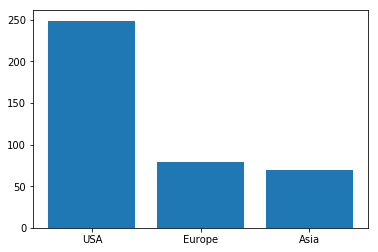

In [133]:
countlist = mpgcopy['Origin'].tolist()
#plt.bar(countlist)
countdict = Counter(countlist)
plt.bar(range(len(countdict)), list(countdict.values()), align='center')
plt.xticks(range(len(countdict)), list(countdict.keys()))
plt.show()
